In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Show first few records
print("First 5 rows:\n", df.head())

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [5]:
# Check dataset structure
print("\nDataset Info:\n")
print(df.info())

# Check missing values
print("\nMissing Values Before Handling:\n")
print(df.isnull().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values Before Handling:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0

In [7]:
# Fill 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill 'Fare' with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill 'Embarked' with most frequent value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill 'Cabin' with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [9]:
# Verify no more nulls
print("\nMissing Values After Handling:\n")
print(df.isnull().sum())


Missing Values After Handling:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Handle missing values first to avoid errors
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Sex' (male = 1, female = 0)
df['Sex'] = le.fit_transform(df['Sex'])

# Encode 'Embarked' (S = 2, C = 0, Q = 1)
df['Embarked'] = le.fit_transform(df['Embarked'])

# Simplify 'Cabin' to first letter, then encode
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
df['Cabin'] = le.fit_transform(df['Cabin'])

# Show the result of encoded columns
print("Encoded 'Sex', 'Embarked', and simplified 'Cabin':\n")
print(df[['Sex', 'Embarked', 'Cabin']].head())

Encoded 'Sex', 'Embarked', and simplified 'Cabin':

   Sex  Embarked  Cabin
0    1         2      8
1    0         0      2
2    0         2      8
3    0         2      2
4    1         2      8


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset (make sure missing values are already handled!)
df = pd.read_csv("Titanic-Dataset.csv")

# Fill missing 'Age' and 'Fare' just in case
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Select numerical features to scale
numerical_cols = ['Age', 'Fare']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display standardized numerical columns
print("Standardized 'Age' and 'Fare':\n")
print(df[numerical_cols].head())

Standardized 'Age' and 'Fare':

        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337



Boxplots Before Removing Outliers:


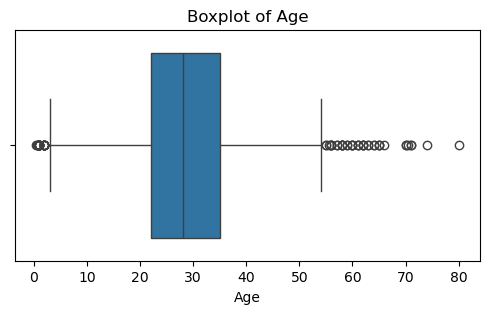

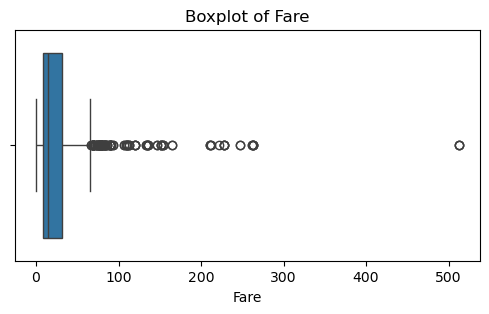


Boxplots After Removing Outliers:


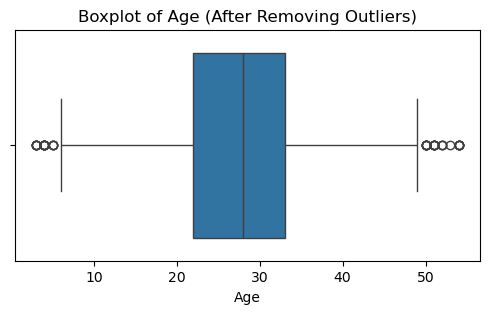

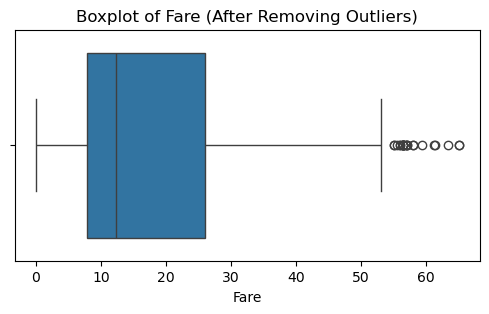


Original Dataset Shape: (891, 12)
Cleaned Dataset Shape:  (721, 12)


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset and prepare numerical columns
df = pd.read_csv("Titanic-Dataset.csv")

# Handle missing values first
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Step 1: Visualize boxplots before removing outliers
numerical_cols = ['Age', 'Fare']

print("\nBoxplots Before Removing Outliers:")
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Step 2: Remove outliers using IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Create mask to filter out outliers
filter_mask = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | 
                (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply mask to get cleaned dataset
df_cleaned = df[filter_mask]

# Step 3: Visualize boxplots after removing outliers
print("\nBoxplots After Removing Outliers:")
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Removing Outliers)')
    plt.show()

# Show how many rows were removed
print(f"\nOriginal Dataset Shape: {df.shape}")
print(f"Cleaned Dataset Shape:  {df_cleaned.shape}")